<a href="https://colab.research.google.com/github/nonyeashley/Network-Intrusion-Detection-Using-Ensemble-Method-/blob/main/Network_Intrusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing packages to load and preview data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
## pre-processing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
## supervised machine learning libraries
from sklearn.linear_model  import LogisticRegression
from sklearn.naive_bayes import GaussianNB
## evaluation libraries
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
## declaring a variable
train_file_path ='/content/drive/MyDrive/IoT Network Intrusion Dataset.csv'
## variable name holding my dataset ("train_file_path")
df = pd.read_csv(train_file_path)
## variable name "df" allows me to read my dataset

In [4]:
df.head(5) ## checking the first 5 columns of the dataset

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


In [5]:
df.tail(5) ## checking the last 5 columns of the dataset

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
625778,192.168.0.24-210.89.164.90-56112-8043-17,192.168.0.24,56112,210.89.164.90,8043,17,25/07/2019 03:25:00 AM,277,1,1,...,0.0,0.0,0.0,277.0,0.000000,277.0,277.0,Anomaly,Mirai,Mirai-UDP Flooding
625779,192.168.0.13-222.131.171.244-554-4570-6,222.131.171.244,4570,192.168.0.13,554,6,26/05/2019 10:06:51 PM,1658,0,2,...,0.0,0.0,0.0,1658.0,0.000000,1658.0,1658.0,Anomaly,DoS,DoS-Synflooding
625780,192.168.0.13-192.168.0.16-9020-52739-6,192.168.0.16,52739,192.168.0.13,9020,6,11/07/2019 01:29:09 AM,77,1,1,...,0.0,0.0,0.0,77.0,0.000000,77.0,77.0,Anomaly,Scan,Scan Port OS
625781,192.168.0.13-192.168.0.16-9020-49784-6,192.168.0.13,9020,192.168.0.16,49784,6,20/05/2019 05:00:29 AM,240,2,1,...,0.0,0.0,0.0,120.0,7.071068,125.0,115.0,Normal,Normal,Normal
625782,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:10 AM,198,2,1,...,0.0,0.0,0.0,99.0,32.526912,122.0,76.0,Anomaly,Mirai,Mirai-UDP Flooding


In [6]:
df.isnull().sum() # checking missing values in the dataset


,0
Flow_ID,0
Src_IP,0
Src_Port,0
Dst_IP,0
Dst_Port,0
...,...
Idle_Max,0
Idle_Min,0
Label,0
Cat,0


In [7]:
df.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.00000,625783.000000,625783.000000,625783.000000,625783.000000,...,625783.000000,625783.0,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000,625783.000000
mean,35026.156190,16387.027479,9.971436,635.422865,1.675566,1.46853,570.738980,929.280973,392.489726,348.126571,...,1.509913,0.0,3.764405,0.353385,4.248735,3.462159,502.503832,52.403995,561.540512,467.264459
std,24721.047752,17550.363037,5.379857,3496.740723,4.309970,1.21949,1161.873195,1731.760875,619.575865,588.161845,...,4.332737,0.0,68.064508,20.723370,88.934148,64.111043,2112.957360,1153.184897,2866.497606,1931.909971
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9020.000000,8899.000000,6.000000,76.000000,0.000000,1.00000,0.000000,18.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,73.000000,0.000000,74.000000,71.000000
50%,51991.000000,9020.000000,6.000000,132.000000,1.000000,1.00000,32.000000,104.000000,30.000000,30.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,93.500000,0.000000,114.000000,78.000000
75%,56361.000000,10101.000000,17.000000,221.000000,2.000000,2.00000,1388.000000,1441.000000,1388.000000,386.000000,...,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,141.000000,1.527525,154.000000,130.000000
max,65500.000000,65371.000000,17.000000,99984.000000,186.000000,560.00000,109846.000000,773284.000000,1464.000000,1464.000000,...,186.000000,0.0,9044.625000,8598.658250,26785.000000,6659.000000,99973.000000,67071.906623,99973.000000,99973.000000


In [8]:
# Check data information
print(df.info())
print ('=====================================================')
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 86 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            625783 non-null  object 
 1   Src_IP             625783 non-null  object 
 2   Src_Port           625783 non-null  int64  
 3   Dst_IP             625783 non-null  object 
 4   Dst_Port           625783 non-null  int64  
 5   Protocol           625783 non-null  int64  
 6   Timestamp          625783 non-null  object 
 7   Flow_Duration      625783 non-null  int64  
 8   Tot_Fwd_Pkts       625783 non-null  int64  
 9   Tot_Bwd_Pkts       625783 non-null  int64  
 10  TotLen_Fwd_Pkts    625783 non-null  float64
 11  TotLen_Bwd_Pkts    625783 non-null  float64
 12  Fwd_Pkt_Len_Max    625783 non-null  float64
 13  Fwd_Pkt_Len_Min    625783 non-null  float64
 14  Fwd_Pkt_Len_Mean   625783 non-null  float64
 15  Fwd_Pkt_Len_Std    625783 non-null  float64
 16  Bw

## Exploratory analysis on the dataset

## A pie chart representing protocol distribution

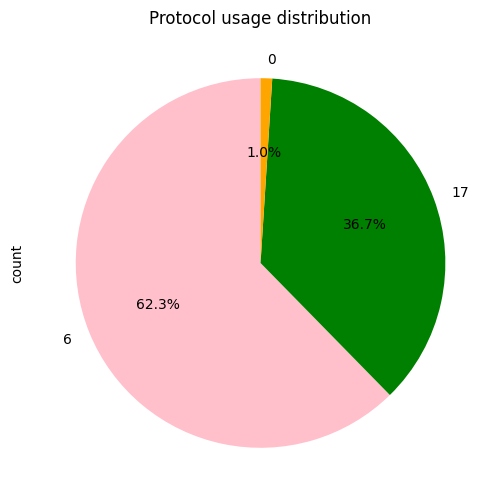

In [9]:

plt.figure(figsize=(8,6))
Protocol=df['Protocol'].value_counts()
color=['pink','green','orange']
Protocol.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors= color)
plt.title('Protocol usage distribution')
plt.show()


## Checking label data against the category

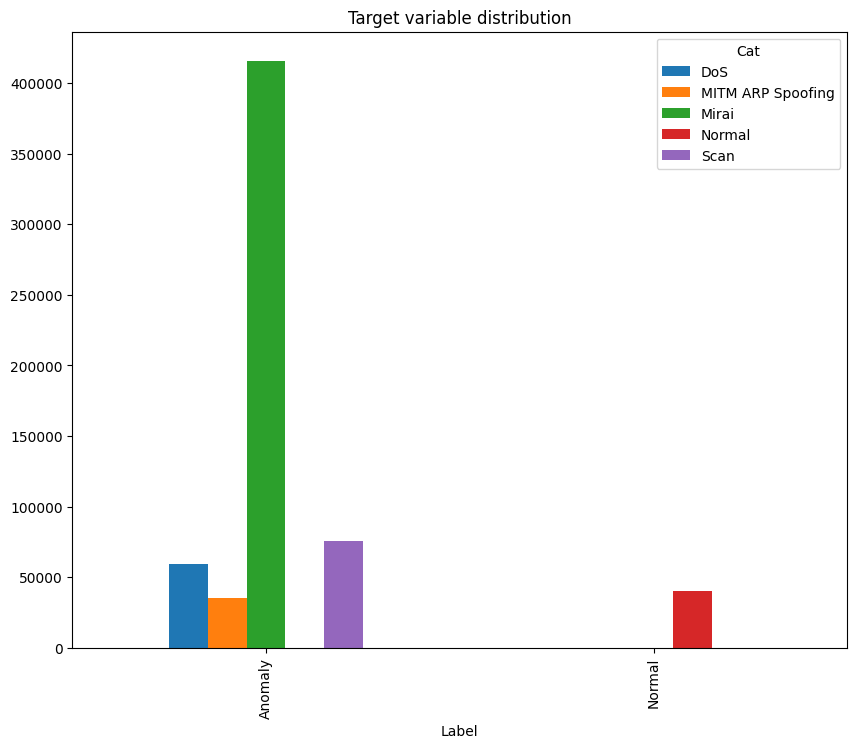

In [10]:
target_variable=df.groupby(['Label','Cat'])['Sub_Cat'].count().unstack().fillna(0)
target_variable.plot(kind='bar',figsize=(10,8))
plt.title('Target variable distribution')
plt.show()


## Merging the category (based on the label (anomaly and normal)) together

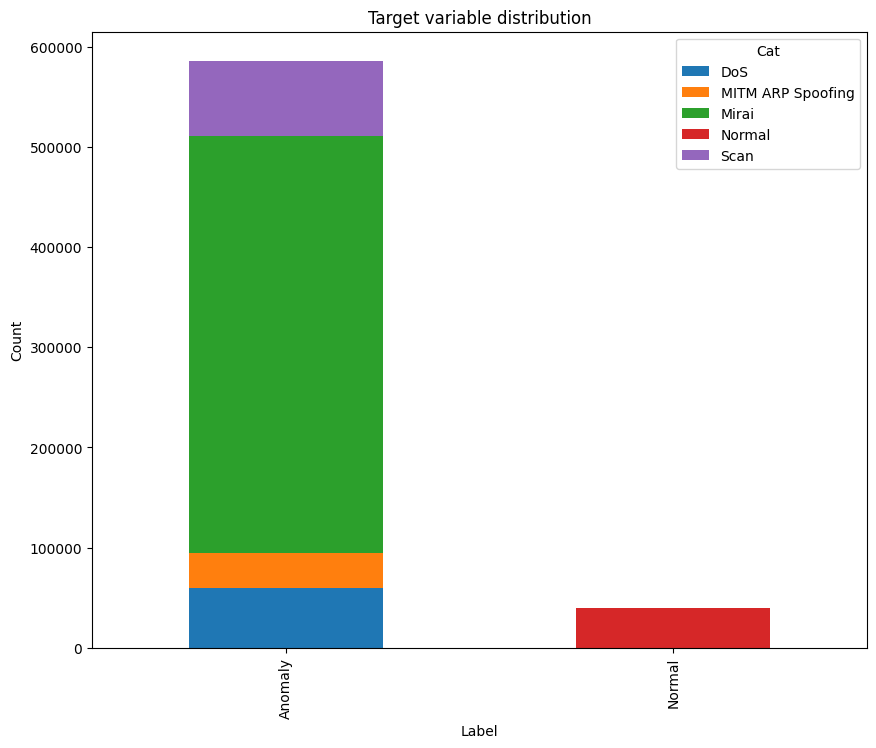

In [11]:
target_variable=df.groupby(['Label','Cat'])['Sub_Cat'].count().unstack().fillna(0)
target_variable.plot(kind='bar', stacked=True,figsize=(10,8))
plt.title('Target variable distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


 ## A scatter plot for flow duration and total forward packets

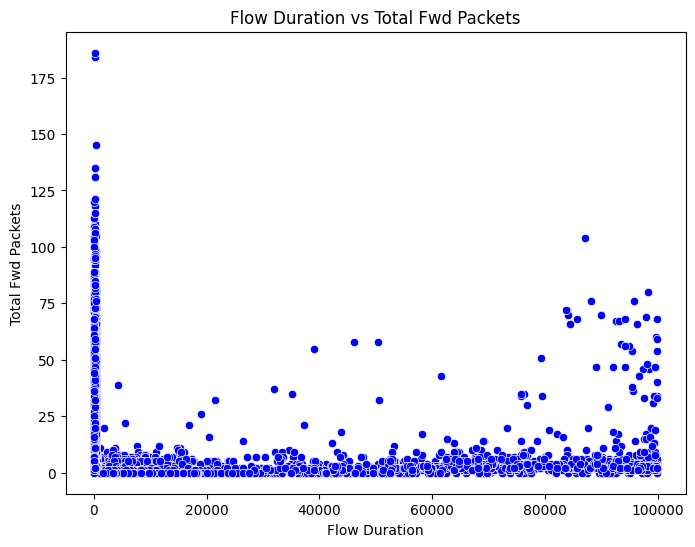

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Flow_Duration',y='Tot_Fwd_Pkts',data=df,color='blue')
plt.title('Flow Duration vs Total Fwd Packets')
plt.xlabel('Flow Duration')
plt.ylabel('Total Fwd Packets')
plt.show()

## A bar chart representing protocol against forward and backward packets

<Figure size 800x600 with 0 Axes>

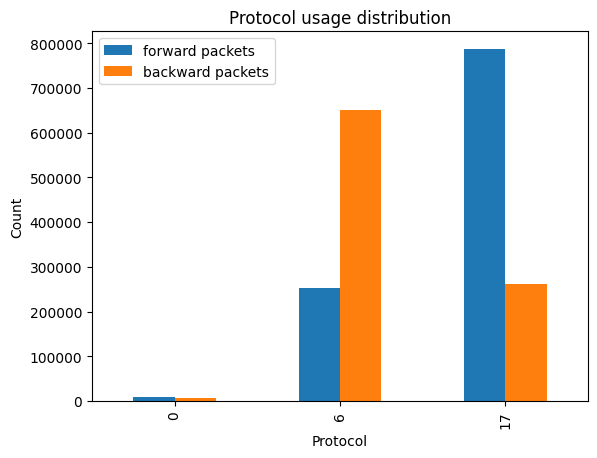

In [13]:
plt.figure(figsize=(8,6))
packets=df['Protocol'].astype('category')
forward_packets=df.groupby('Protocol')['Tot_Fwd_Pkts'].sum()
backward_packets=df.groupby('Protocol')['Tot_Bwd_Pkts'].sum()
data= pd.DataFrame({'forward packets':forward_packets,'backward packets':backward_packets})
data.plot(kind='bar')
plt.title('Protocol usage distribution')
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.show()

## Checking the total number of elements in the category

In [14]:
category=df['Cat'].value_counts()
print (category)

Cat
Mirai                415677
Scan                  75265
DoS                   59391
Normal                40073
MITM ARP Spoofing     35377
Name: count, dtype: int64


## A bar chart showing category in the dataset

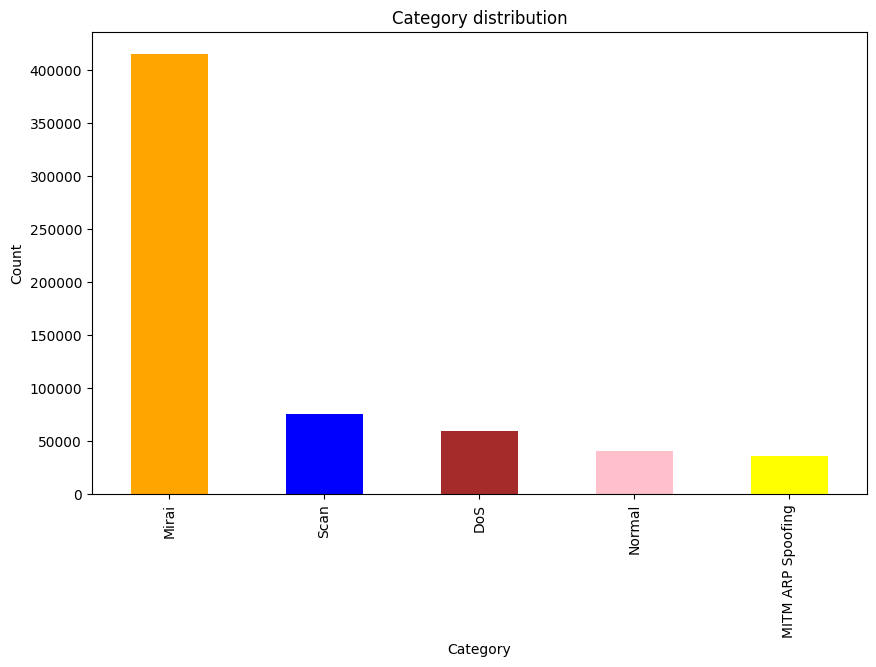

In [15]:
plt.figure(figsize=(10,6))
color=['orange','blue','brown','pink','yellow']
category.plot(kind='bar', color=color)
plt.title('Category distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


## A pie chart showing the category distribution

Text(0.5, 1.0, 'Category distribution')

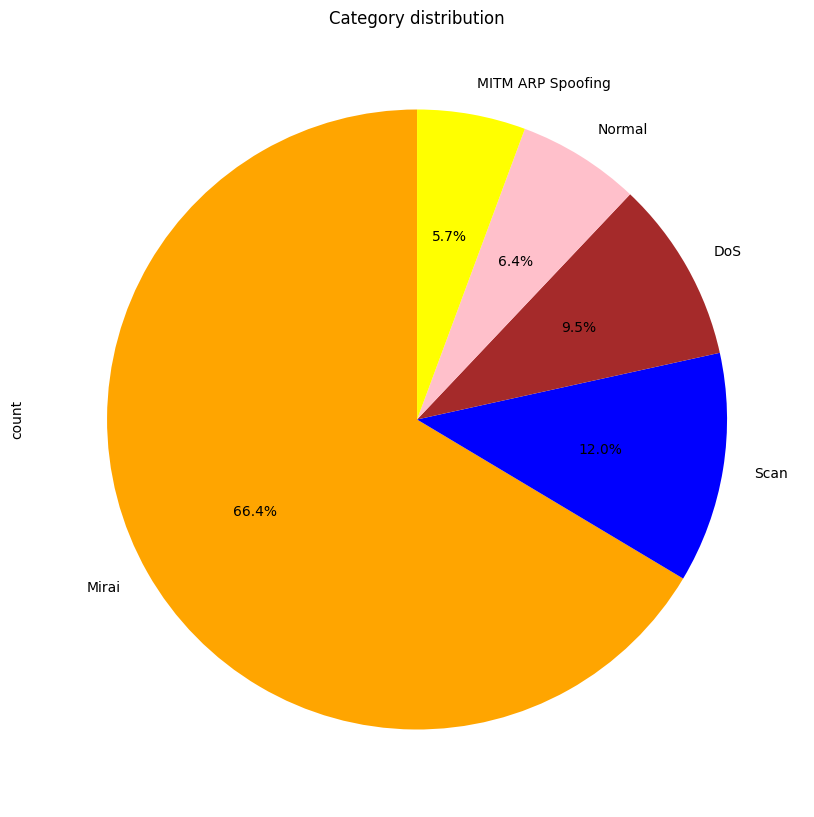

In [16]:
plt.figure(figsize=(10,15))
color=['orange','blue','brown','pink','yellow']
category.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors= color)
plt.title('Category distribution')

## Total number of elements in sub category

In [17]:
sub_category=df['Sub_Cat'].value_counts()
print(sub_category)

Sub_Cat
Mirai-UDP Flooding       183554
Mirai-Hostbruteforceg    121181
DoS-Synflooding           59391
Mirai-HTTP Flooding       55818
Mirai-Ackflooding         55124
Scan Port OS              53073
Normal                    40073
MITM ARP Spoofing         35377
Scan Hostport             22192
Name: count, dtype: int64


## A bar chart for sub category

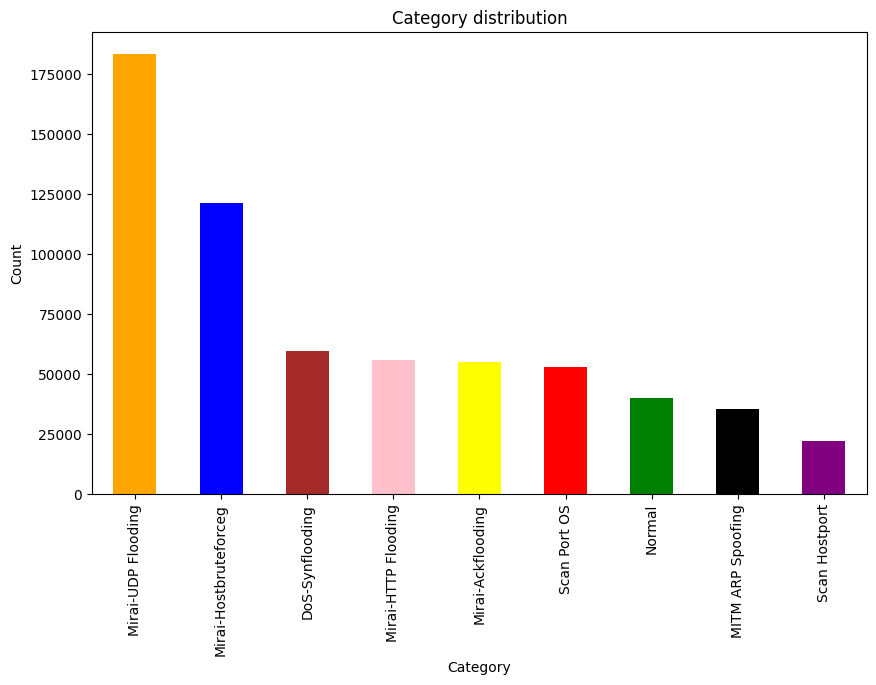

In [18]:
plt.figure(figsize=(10,6))
color=['orange','blue','brown','pink','yellow','red','green','black','purple']
sub_category.plot(kind='bar', color=color)
plt.title('Category distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## A pie chart for sub category

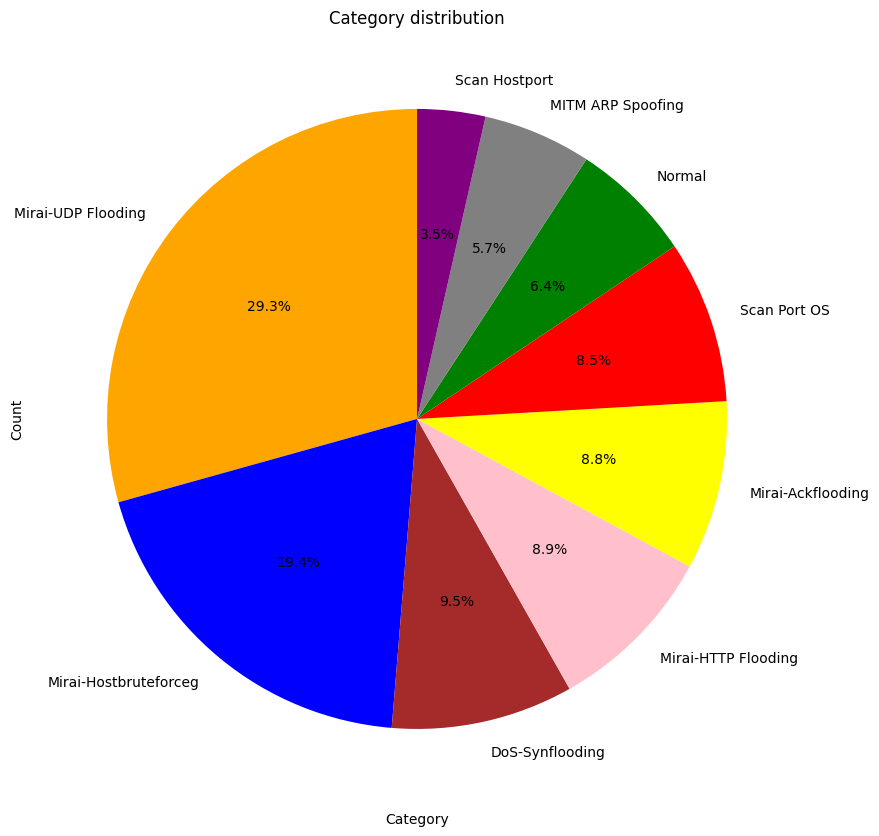

In [19]:
plt.figure(figsize=(10,15))
color=['orange','blue','brown','pink','yellow','red','green','grey','purple']
sub_category.plot(kind='pie',autopct='%1.1f%%',startangle=90,colors= color)
plt.title('Category distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## Print unique element label


In [20]:
unique_label=df['Label'].unique()
print(unique_label)

['Anomaly' 'Normal']


In [21]:
# Count the number of occurrences of each element in the 'Label' column
label_counts = df['Label'].value_counts()
print("Count of each element in 'Label' column:\n", label_counts)

Count of each element in 'Label' column:
 Label
Anomaly    585710
Normal      40073
Name: count, dtype: int64


In [22]:
df.head()

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg


## Data Pre-processing

In [23]:
df= df.drop(columns=['Flow_ID','Timestamp','Cat','Sub_Cat'])
print (df)

                 Src_IP  Src_Port           Dst_IP  Dst_Port  Protocol  \
0          192.168.0.13     10000     192.168.0.16     10101        17   
1       222.160.179.132      2179     192.168.0.13       554         6   
2          192.168.0.16     52727     192.168.0.13      9020         6   
3          192.168.0.16     52964     192.168.0.13      9020         6   
4           192.168.0.1     36763  239.255.255.250      1900        17   
...                 ...       ...              ...       ...       ...   
625778     192.168.0.24     56112    210.89.164.90      8043        17   
625779  222.131.171.244      4570     192.168.0.13       554         6   
625780     192.168.0.16     52739     192.168.0.13      9020         6   
625781     192.168.0.13      9020     192.168.0.16     49784         6   
625782     192.168.0.13     10000     192.168.0.16     10101        17   

        Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  TotLen_Fwd_Pkts  \
0                  75             1      

In [24]:
## seperate the columns into numeric and object types
numeric_columns = df.select_dtypes(include=[np.number]).columns
categorical_columns = df.select_dtypes(include=['object']).columns
## create separate Dataframes for numeric and object columns
df_numeric = df[numeric_columns]
df_categorical = df[categorical_columns]

##print the first few rows of both dataframes
print("Numeric columns:")
print(df_numeric.head())
print("\nCategorical columns:")
print(df_categorical.head())

Numeric columns:
   Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0     10000     10101        17             75             1             1   
1      2179       554         6           5310             1             2   
2     52727      9020         6            141             0             3   
3     52964      9020         6            151             0             2   
4     36763      1900        17            153             2             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  ...  \
0            982.0           1430.0            982.0            982.0  ...   
1              0.0              0.0              0.0              0.0  ...   
2              0.0           2806.0              0.0              0.0  ...   
3              0.0           2776.0              0.0              0.0  ...   
4            886.0            420.0            452.0            434.0  ...   

   Fwd_Act_Data_Pkts  Fwd_Seg_Size_Min  Activ

Applying label encoder to the object dataset

In [25]:
## intialize label encoder
label_encoder= LabelEncoder()

## apply label encoder to each object coluns
for col in df_categorical.columns:
  df_categorical[col]=label_encoder.fit_transform(df_categorical[col])

## print the first few rows of the updated dataframe
print(df_categorical.head())

<ipython-input-25-e1102ab06f83>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[col]=label_encoder.fit_transform(df_categorical[col])
<ipython-input-25-e1102ab06f83>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorical[col]=label_encoder.fit_transform(df_categorical[col])
<ipython-input-25-e1102ab06f83>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

   Src_IP  Dst_IP  Label
0   25883     203      0
1   34617     200      0
2   25886     200      0
3   25886     200      0
4   25881     317      0


In [26]:
df=pd.concat([df_numeric,df_categorical],axis=1)
print(df.head())

   Src_Port  Dst_Port  Protocol  Flow_Duration  Tot_Fwd_Pkts  Tot_Bwd_Pkts  \
0     10000     10101        17             75             1             1   
1      2179       554         6           5310             1             2   
2     52727      9020         6            141             0             3   
3     52964      9020         6            151             0             2   
4     36763      1900        17            153             2             1   

   TotLen_Fwd_Pkts  TotLen_Bwd_Pkts  Fwd_Pkt_Len_Max  Fwd_Pkt_Len_Min  ...  \
0            982.0           1430.0            982.0            982.0  ...   
1              0.0              0.0              0.0              0.0  ...   
2              0.0           2806.0              0.0              0.0  ...   
3              0.0           2776.0              0.0              0.0  ...   
4            886.0            420.0            452.0            434.0  ...   

   Active_Std  Active_Max  Active_Min  Idle_Mean     Idle_Std 

In [27]:
df.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Src_IP,Dst_IP,Label
0,10000,10101,17,75,1,1,982.0,1430.0,982.0,982.0,...,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,25883,203,0
1,2179,554,6,5310,1,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,34617,200,0
2,52727,9020,6,141,0,3,0.0,2806.0,0.0,0.0,...,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,25886,200,0
3,52964,9020,6,151,0,2,0.0,2776.0,0.0,0.0,...,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,25886,200,0
4,36763,1900,17,153,2,1,886.0,420.0,452.0,434.0,...,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,25881,317,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 82 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Src_Port           625783 non-null  int64  
 1   Dst_Port           625783 non-null  int64  
 2   Protocol           625783 non-null  int64  
 3   Flow_Duration      625783 non-null  int64  
 4   Tot_Fwd_Pkts       625783 non-null  int64  
 5   Tot_Bwd_Pkts       625783 non-null  int64  
 6   TotLen_Fwd_Pkts    625783 non-null  float64
 7   TotLen_Bwd_Pkts    625783 non-null  float64
 8   Fwd_Pkt_Len_Max    625783 non-null  float64
 9   Fwd_Pkt_Len_Min    625783 non-null  float64
 10  Fwd_Pkt_Len_Mean   625783 non-null  float64
 11  Fwd_Pkt_Len_Std    625783 non-null  float64
 12  Bwd_Pkt_Len_Max    625783 non-null  float64
 13  Bwd_Pkt_Len_Min    625783 non-null  float64
 14  Bwd_Pkt_Len_Mean   625783 non-null  float64
 15  Bwd_Pkt_Len_Std    625783 non-null  float64
 16  Fl

In [29]:
df.isnull().sum()

,0
Src_Port,0
Dst_Port,0
Protocol,0
Flow_Duration,0
Tot_Fwd_Pkts,0
...,...
Idle_Max,0
Idle_Min,0
Src_IP,0
Dst_IP,0


In [30]:


df=df.replace([float('inf'), -float('inf')], float('nan')) ##  anywhere all this format appear
df=df.fillna(0)## filling with 0
df=df.apply(lambda x:x.astype(int) if x.dtype=='float64' else x)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625783 entries, 0 to 625782
Data columns (total 82 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   Src_Port           625783 non-null  int64
 1   Dst_Port           625783 non-null  int64
 2   Protocol           625783 non-null  int64
 3   Flow_Duration      625783 non-null  int64
 4   Tot_Fwd_Pkts       625783 non-null  int64
 5   Tot_Bwd_Pkts       625783 non-null  int64
 6   TotLen_Fwd_Pkts    625783 non-null  int64
 7   TotLen_Bwd_Pkts    625783 non-null  int64
 8   Fwd_Pkt_Len_Max    625783 non-null  int64
 9   Fwd_Pkt_Len_Min    625783 non-null  int64
 10  Fwd_Pkt_Len_Mean   625783 non-null  int64
 11  Fwd_Pkt_Len_Std    625783 non-null  int64
 12  Bwd_Pkt_Len_Max    625783 non-null  int64
 13  Bwd_Pkt_Len_Min    625783 non-null  int64
 14  Bwd_Pkt_Len_Mean   625783 non-null  int64
 15  Bwd_Pkt_Len_Std    625783 non-null  int64
 16  Flow_Byts/s        625783 non-null  in

In [32]:
X=df.drop(columns=['Label']) ## features
y=df['Label'] # target variable
print (X.shape)
print(y.shape)

(625783, 81)
(625783,)


In [33]:
X.head()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Src_IP,Dst_IP
0,10000,10101,17,75,1,1,982,1430,982,982,...,0,0,0,0,75,0,75,75,25883,203
1,2179,554,6,5310,1,2,0,0,0,0,...,0,0,0,0,2655,2261,4254,1056,34617,200
2,52727,9020,6,141,0,3,0,2806,0,0,...,0,0,0,0,70,0,71,70,25886,200
3,52964,9020,6,151,0,2,0,2776,0,0,...,0,0,0,0,151,0,151,151,25886,200
4,36763,1900,17,153,2,1,886,420,452,434,...,0,0,0,0,76,0,77,76,25881,317


In [34]:
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


# splitting into train (70%) and test (30%)

In [35]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(438048, 81)
(438048,)
(187735, 81)
(187735,)


In [37]:
smote = SMOTE(random_state=42)## i use smote because the dataset is inbalance (majority falls unders 'Anomaly(0)' and minority(normal(1)') which makes the dataset inbalance
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## training Logisitic regression  on the dataset

In [38]:
log_reg = LogisticRegression()
## train the model
log_reg.fit(X_train_resampled, y_train_resampled)

##  making predictions

y_pred= log_reg.predict(X_test)
## evaluate the model
accuracy_log= accuracy_score(y_test, y_pred)
confusion_matrix_log= confusion_matrix(y_test,y_pred)
classification_report_log= classification_report(y_test,y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [39]:
print('accuracy',accuracy_log)
print('\nconfusion matrix:\n',confusion_matrix_log)
print('\nclassification report:\n',classification_report_log)

accuracy 0.8552640690334781

confusion matrix:
 [[149838  25902]
 [  1270  10725]]

classification report:
               precision    recall  f1-score   support

           0       0.99      0.85      0.92    175740
           1       0.29      0.89      0.44     11995

    accuracy                           0.86    187735
   macro avg       0.64      0.87      0.68    187735
weighted avg       0.95      0.86      0.89    187735



# training naives bayes on the dataset

In [40]:
naive_bayes=GaussianNB()
## train the model
naive_bayes.fit(X_train_resampled,y_train_resampled)

## making prediction
y_pred_naive = naive_bayes.predict(X_test)
## evaluate the model
accuracy_naive= accuracy_score(y_test,y_pred_naive)
confusion_matrix_naive= confusion_matrix(y_test,y_pred_naive)
classification_report_naive= classification_report(y_test,y_pred_naive)

In [41]:
print('accuracy',accuracy_naive)
print('\nconfusion matrix:\n',confusion_matrix_naive)
print('\nclassification report:\n',classification_report_naive)

accuracy 0.44604895198018485

confusion matrix:
 [[ 71782 103958]
 [    38  11957]]

classification report:
               precision    recall  f1-score   support

           0       1.00      0.41      0.58    175740
           1       0.10      1.00      0.19     11995

    accuracy                           0.45    187735
   macro avg       0.55      0.70      0.38    187735
weighted avg       0.94      0.45      0.55    187735



## Model evaluation

Text(95.72222222222221, 0.5, 'True Labels')

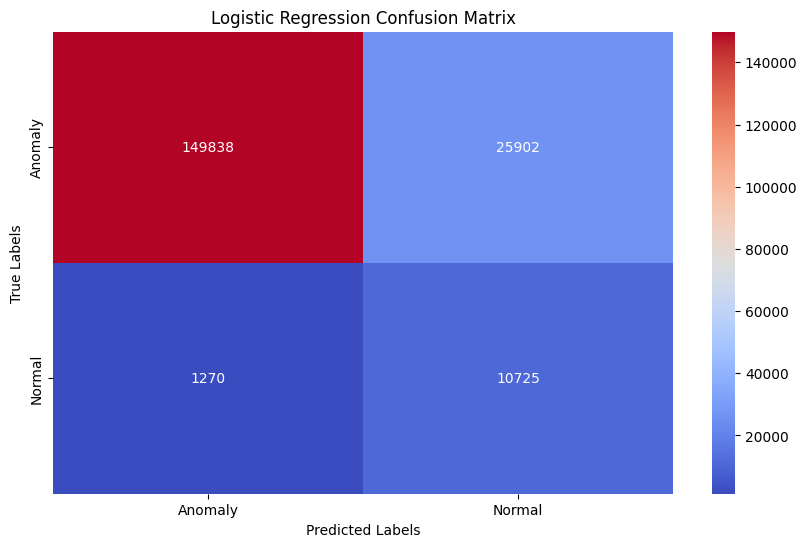

In [42]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix_log, annot=True, fmt='d', cmap='coolwarm',xticklabels=['Anomaly','Normal'], yticklabels=['Anomaly','Normal'])
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

Text(95.72222222222221, 0.5, 'True Labels')

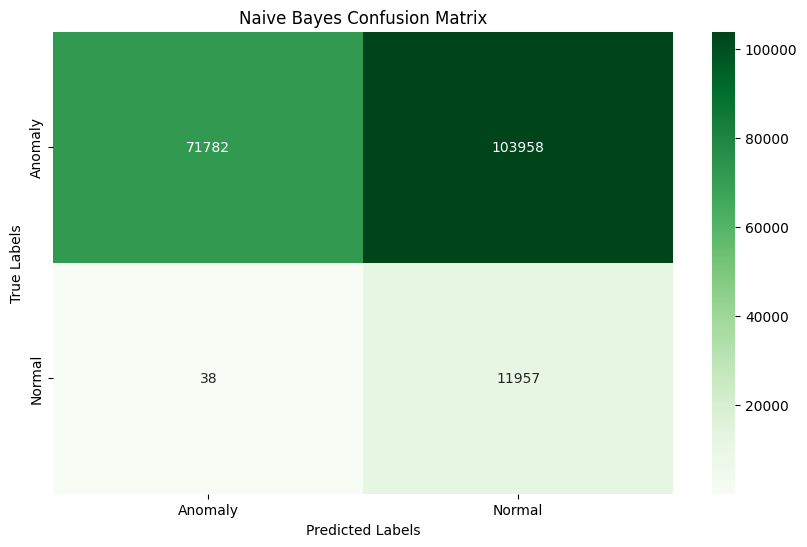

In [43]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix_naive, annot=True, fmt='d', cmap='Greens',xticklabels=['Anomaly','Normal'], yticklabels=['Anomaly','Normal'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


## Ensemble model
 voting classifier

 The base classifiers used include

 1. Logistic Regressiuon

  2. Naive bayes

  3. Random Forest
  

In [44]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier


In [45]:
## listingout the base models
log_reg= LogisticRegression()
naive_bayes=GaussianNB()
random_forest=RandomForestClassifier()

## creating voting classifer with 3 base models
voting_classifier=VotingClassifier(estimators=[('log_reg',log_reg),
 ('naive bayes',naive_bayes),('random forest',random_forest)],voting='hard')
## Training the voting classifier
voting_classifier.fit(X_train_resampled,y_train_resampled)

y_pred_voting = voting_classifier.predict(X_test)
## evaluate the model
accuracy_voting= accuracy_score(y_test, y_pred_voting)
confusion_matrix_voting= confusion_matrix(y_test,y_pred_voting)
classification_report_voting= classification_report(y_test,y_pred_voting)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [46]:
## print evaluation results
print('accuracy',accuracy_voting)
print('\nconfusion matrix:\n',confusion_matrix_voting)
print('\nclassification report:\n',classification_report_voting)

accuracy 0.9474791594534849

confusion matrix:
 [[166006   9734]
 [   126  11869]]

classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    175740
           1       0.55      0.99      0.71     11995

    accuracy                           0.95    187735
   macro avg       0.77      0.97      0.84    187735
weighted avg       0.97      0.95      0.95    187735



Text(95.72222222222221, 0.5, 'True Labels')

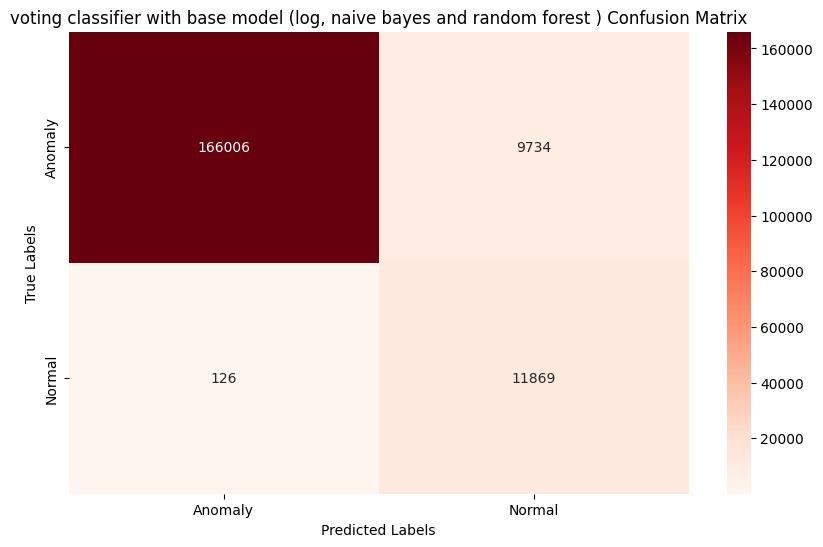

In [47]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix_voting, annot=True, fmt='d', cmap='Reds',xticklabels=['Anomaly','Normal'], yticklabels=['Anomaly','Normal'])
plt.title('voting classifier with base model (log, naive bayes and random forest ) Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

## voting classifier with another base model

1. logistic regression

2. naive bayes

3. decision tree

In [48]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
## initialize the base classifieer
## since i have saved logistic regression and naive bayes in a variable i can always refer to them
decision_tree=DecisionTreeClassifier()
## create the votingclassifier with the base model
voting_classifier= VotingClassifier(estimators=[
    ('log_reg',log_reg),
    ('naive bayes',naive_bayes),
    ('decision_tree',decision_tree)
],voting='hard')

## training voting classifier
voting_classifier.fit(X_train_resampled,y_train_resampled)
## making predicitions
y_pred_voting= voting_classifier.predict(X_test)

## model evaluation
model_accuracy=accuracy_score(y_test,y_pred_voting)
conf_matrix_voting= confusion_matrix(y_test,y_pred_voting)
class_report_voting= classification_report(y_test,y_pred_voting)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
## printing the model evaluation
print('accuracy',model_accuracy)
print('\nconfusion matrix:\n',conf_matrix_voting)
print('\nclassification report:\n',class_report_voting)

accuracy 0.9474045862518976

confusion matrix:
 [[165939   9801]
 [    73  11922]]

classification report:
               precision    recall  f1-score   support

           0       1.00      0.94      0.97    175740
           1       0.55      0.99      0.71     11995

    accuracy                           0.95    187735
   macro avg       0.77      0.97      0.84    187735
weighted avg       0.97      0.95      0.95    187735



Text(95.72222222222221, 0.5, 'True Labels')

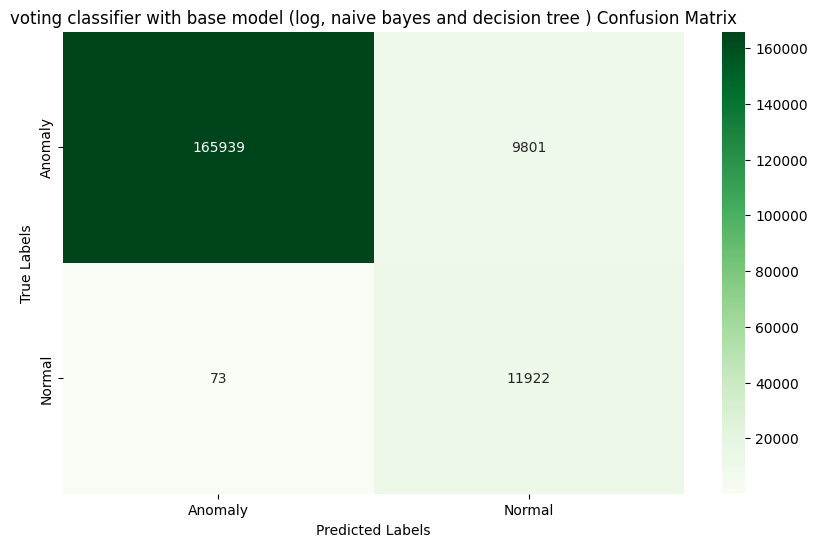

In [51]:
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix_voting, annot=True, fmt='d', cmap='Greens',xticklabels=['Anomaly','Normal'], yticklabels=['Anomaly','Normal'])
plt.title('voting classifier with base model (log, naive bayes and decision tree ) Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

In [52]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
ada_boost=AdaBoostClassifier()

## initialize the base classifier
voting_classifier=VotingClassifier(
    estimators=[
        ('log_reg',log_reg),
        ('naive bayes',naive_bayes),
        ('decision_tree',decision_tree),
        ('ada_boost',ada_boost)
    ],
    voting='hard'
)
## training the model
voting_classifier.fit(X_train_resampled,y_train_resampled)
## making predictions
y_pred_voting=voting_classifier.predict(X_test)
## evaluate the model
accuracy = accuracy_score(y_test,y_pred_voting)
confusion_matrix_voting= confusion_matrix(y_test,y_pred_voting)
classification_report_voting= classification_report(y_test,y_pred_voting)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
## print evaluation results
print ('accuracy',accuracy)
print('\nconfusion matrix:\n',confusion_matrix_voting)
print('\nclassification report:\n',classification_report_voting)

accuracy 0.9939968572722189

confusion matrix:
 [[175094    646]
 [   481  11514]]

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    175740
           1       0.95      0.96      0.95     11995

    accuracy                           0.99    187735
   macro avg       0.97      0.98      0.98    187735
weighted avg       0.99      0.99      0.99    187735



Text(95.72222222222221, 0.5, 'True Labels')

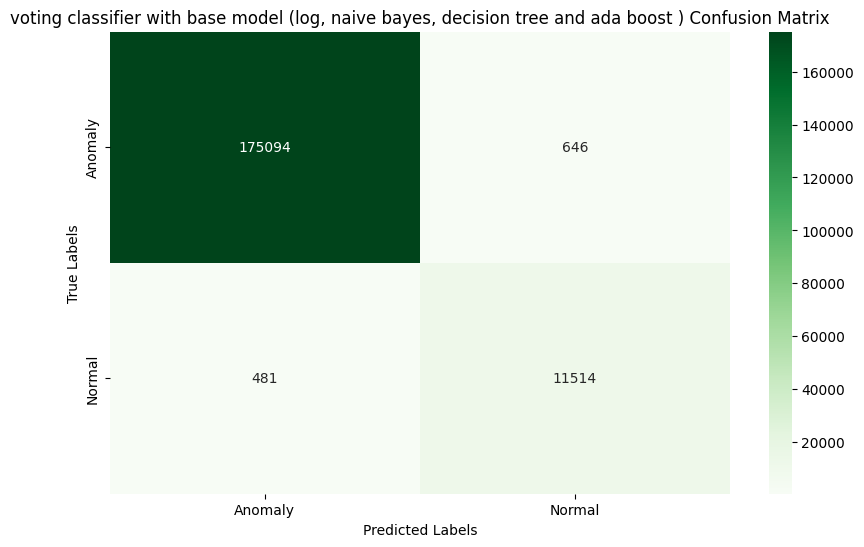

In [55]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix_voting, annot=True, fmt='d', cmap='Greens',xticklabels=['Anomaly','Normal'], yticklabels=['Anomaly','Normal'])
plt.title('voting classifier with base model (log, naive bayes, decision tree and ada boost ) Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')


<Figure size 1200x3000 with 0 Axes>

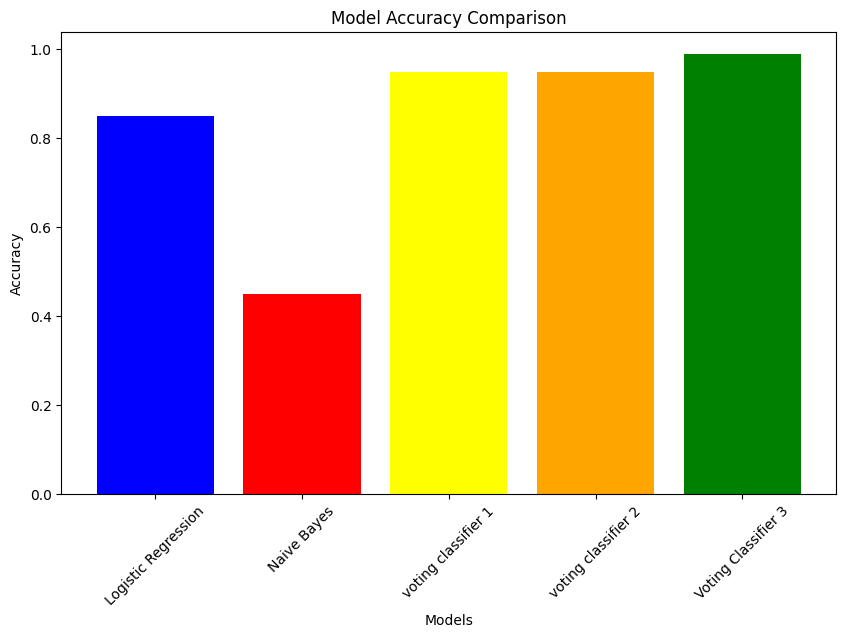

In [56]:
## plotting accuracy graph for all the modelds
plt.figure(figsize=(12,30))
models = ['Logistic Regression', 'Naive Bayes', 'voting classifier 1','voting classifier 2', 'Voting Classifier 3']
accuracy=[0.85,0.45,0.95,0.95,0.99]
color=['blue','red','yellow','orange','green']
plt.figure(figsize=(10,6))
plt.bar(models,accuracy,color=color)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(rotation=45)
plt.show()

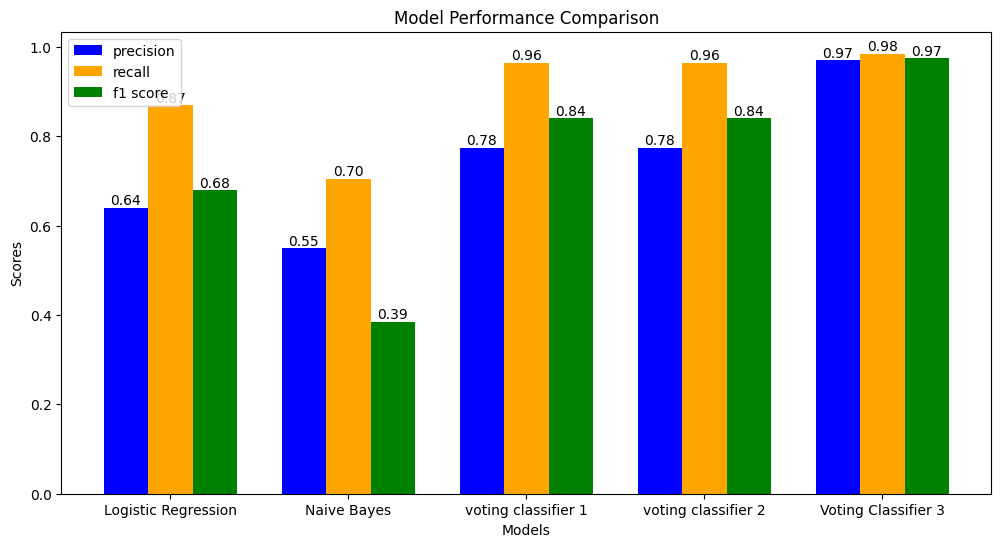

In [57]:
model_log= [
    'Logistic Regression',
    'Naive Bayes',
    'voting classifier 1',
    'voting classifier 2',
    'Voting Classifier 3'
]
logistic_regression={
    "precision":[0.99,0.29],
    "recall":[0.85,0.89],
    "f1 score":[0.92,0.44]
}
naive_bayes={
    "precision":[1.00,0.10],
    "recall":[0.41,1.00],
    "f1 score":[0.58,0.19]
}
voting_classifier_1={
    "precision":[1.00,0.55],
    "recall":[0.94,0.99],
    "f1 score":[0.97,0.71]
}
voting_classifier_2={
    "precision":[1.00,0.55],
    "recall":[0.94,0.99],
    "f1 score":[0.97,0.71]
}
voting_classifier_3={
    "precision":[1.00,0.94],
    "recall":[1.00,0.97],
    "f1 score":[1.00,0.95]
}
precision_score_model=[
    np.mean(logistic_regression['precision']),
    np.mean(naive_bayes['precision']),
    np.mean(voting_classifier_1['precision']),
    np.mean(voting_classifier_2['precision']),
    np.mean(voting_classifier_3['precision'])
]
recall_score_model=[
    np.mean(logistic_regression['recall']),
    np.mean(naive_bayes['recall']),
    np.mean(voting_classifier_1['recall']),
    np.mean(voting_classifier_2['recall']),
    np.mean(voting_classifier_3['recall'])
]
f1_score_model=[
    np.mean(logistic_regression['f1 score']),
    np.mean(naive_bayes['f1 score']),
    np.mean(voting_classifier_1['f1 score']),
    np.mean(voting_classifier_2['f1 score']),
    np.mean(voting_classifier_3['f1 score'])
]
x_model=np.arange(len(model_log))
width=0.25
fig,ax=plt.subplots(figsize=(12,6))
bar1=ax.bar(x_model-width,precision_score_model,width,label='precision',color='blue')
bar2=ax.bar(x_model,recall_score_model,width,label='recall',color='orange')
bar3=ax.bar(x_model+width,f1_score_model,width,label='f1 score',color='green')

for bars in [bar1,bar2,bar3]:
    for bar in bars:
        height=bar.get_height()
        ax.text(bar.get_x()+bar.get_width()/2,height,f'{height:.2f}',ha='center',va='bottom',fontsize=10,color='black')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x_model)
ax.set_xticklabels(model_log)
ax.legend()
plt.show()